In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_rel
import warnings
warnings.filterwarnings('ignore')

# <span style='background:yellow'> Creating only SD and Nobeat bars
in order to mix them later with trained-untrained bars

In [4]:
df=pd.read_excel('../pre-post_experiment/results/PreprocessedResults_NoOutliers.xlsx')
df=df.iloc[:,[0,11,12,13,14,15,16,17,18,19]]
df.rename(lambda x:x.replace('.1',''),axis='columns',inplace=True)
def specify_group(x):
    parts=x.split('_')[1]
    if parts == 'audtrain1':
        return 'aud'
    elif parts == 'audtrain2':
        return 'aud'
    elif parts == 'vistrain1':
        return 'vis'
    elif parts == 'vistrain2':
        return 'vis'
    elif parts == 'notrain':
        return 'notrain'
def specify_time(x):
    if x.split('_')[2] == 'post':
        return 'Post'
    else:
        return 'Pre'
df['group']=df['Name'].apply(specify_group)
df['Time']=df['Name'].apply(specify_time)
df

,Name,AudSD,AudIrreg,AudReg,VisSD,VisIrreg,VisReg,TactSD,TactIrreg,TactReg,group,Time
0,train10_audtrain2_2023-11-09,0.86,0.54,0.83,0.71,0.79,0.63,0.76,0.71,0.63,aud,Pre
1,train10_audtrain2_post_2023-11-23,0.86,0.46,0.96,0.62,0.67,0.50,0.67,0.63,0.88,aud,Post
2,train11_vistrain2_2023-11-09,0.57,0.33,0.50,0.43,0.46,0.29,0.71,0.21,0.42,vis,Pre
3,train11_vistrain2_post_2023-11-23,0.76,0.58,0.50,0.29,0.42,0.42,0.62,0.46,0.21,vis,Post
4,train14_notrain_2023-11-10,0.81,0.29,0.46,0.57,0.50,0.33,0.76,0.38,0.29,notrain,Pre
...,...,...,...,...,...,...,...,...,...,...,...,...
123,train81_audtrain1_post_2024-03-30,1.00,0.88,0.96,0.81,0.75,0.75,0.90,0.67,0.88,aud,Post
124,train8_notrain_2023-11-07,0.62,0.83,0.67,0.76,0.38,0.38,0.76,0.58,0.33,notrain,Pre
125,train8_notrain_post_2023-11-21,0.71,0.54,0.63,0.76,0.67,0.46,0.76,0.46,0.63,notrain,Post
126,train9_notrain_2023-11-08,0.90,0.50,0.54,0.71,0.50,0.54,0.71,0.63,0.50,notrain,Pre


In [5]:
def make_2bar_plots(df,fixed_modality,modality,mod,color):
    sns.set_style('whitegrid')
    plt.figure(figsize=(3,4))
    ############# plot #############
    g=sns.catplot(data=df, kind='bar', x='Time', y='value',col='Timing_level',ci = "sd", 
                  palette=['cyan','blue'],edgecolor="black",
                   errcolor="black", errwidth=1.5, capsize = 0.1, height=7, aspect=0.3,alpha=0.9,
                  legend=False, sharey=True, sharex=True, margin_titles=False)

    g.map(sns.stripplot,'Time','value',hue=df['group'],palette={mod: color}, dodge=True,
           jitter=0.15,alpha=0.9, edgecolor='k', linewidth=0.8, size=8)

    ############ Aestetics ###############
    g.fig.tight_layout()
    g.set_axis_labels("","Percentage Correct",size=18)
    g.set_titles('')
    g.axes[0,0].set_xlabel('Single duration',alpha=1,size=15)
    g.axes[0,1].set_xlabel('No-beat sequence',alpha=1,size=15)
#     g.axes[0,2].set_xlabel('Beat sequence',alpha=1,size=15)
    g.set_titles(row_template='{row_name}',col_template='{col_name}')
    g.set_titles("")
    sns.despine(ax=g.axes[0, 1], left=True)
#     sns.despine(ax=g.axes[0, 2], left=True)
    g.set_xticklabels([]) # makes labels for each bar disappers
    g.set_yticklabels(size=13)
    g.axes[0,0].axhline(y=0.33, color='black', linestyle='--',lw=2)
    g.axes[0,1].axhline(y=0.33, color='black', linestyle='--',lw=2)
#     g.axes[0,2].axhline(y=0.33, color='black', linestyle='--',lw=2)
    g.fig.suptitle(f"Performance in {fixed_modality} modality", y=1.02,size=16)  

    ############## legend ################
    new_labels = [f"{modality} training",'Pre-test', 'Post-test']
    handles_swarm, labels_swarm = g.axes[0, 0].get_legend_handles_labels()

    # Create a legend with custom icon colors
    legend_colors = [color, 'cyan','blue']  # Replace with your desired colors

    custom_handles = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markeredgecolor='black', markersize=10) if idx < 1
        else plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markeredgecolor='black', markersize=13)
        for idx, color in enumerate(legend_colors)
    ]

    dot_legend = plt.legend(custom_handles, new_labels, loc='upper left', bbox_to_anchor=(1, 1),
                            frameon=False, fontsize=15, labelcolor='0.1', title='')

    # Optionally, set the legend text (labels) color
    dot_legend.get_title().set_color('0.2')  

    from matplotlib.ticker import PercentFormatter
    g.axes[0, 0].set_ylim(0, 1.04)
    g.axes[0, 0].yaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))
    plt.show()

In [6]:
df_beatremoved=df.melt(['Time','group'],['AudSD','AudIrreg'],var_name='Timing_level',value_name='value')
df_beatremoved

,Time,group,Timing_level,value
0,Pre,aud,AudSD,0.86
1,Post,aud,AudSD,0.86
2,Pre,vis,AudSD,0.57
3,Post,vis,AudSD,0.76
4,Pre,notrain,AudSD,0.81
...,...,...,...,...
251,Post,aud,AudIrreg,0.88
252,Pre,notrain,AudIrreg,0.83
253,Post,notrain,AudIrreg,0.54
254,Pre,notrain,AudIrreg,0.50


In [7]:
### Auditory training group
audsd_pre = df_beatremoved[(df_beatremoved['Timing_level']=='AudSD')&(df_beatremoved['Time']=='Pre')&(df_beatremoved['group']=='aud')]['value']
audsd_post = df_beatremoved[(df_beatremoved['Timing_level']=='AudSD')&(df_beatremoved['Time']=='Post')&(df_beatremoved['group']=='aud')]['value']
audirreg_pre = df_beatremoved[(df_beatremoved['Timing_level']=='AudIrreg')&(df_beatremoved['Time']=='Pre')&(df_beatremoved['group']=='aud')]['value']
audirreg_post = df_beatremoved[(df_beatremoved['Timing_level']=='AudIrreg')&(df_beatremoved['Time']=='Post')&(df_beatremoved['group']=='aud')]['value']
print(f"mean AudSD pre-test is {audsd_pre.mean()}")
print(f"mean AudSD post-test is {audsd_post.mean()}")
print(f"mean AudIrreg pre-test is {audirreg_pre.mean()}")
print(f"mean AudIrreg post-test is {audirreg_post.mean()}")

mean AudSD pre-test is 0.7545000000000001
mean AudSD post-test is 0.7689999999999999
mean AudIrreg pre-test is 0.5385
mean AudIrreg post-test is 0.5685


In [10]:
t_statistic, p_value = ttest_rel(audsd_pre, audsd_post)
print(t_statistic)
display(p_value)
t_statistic, p_value = ttest_rel(audirreg_pre, audirreg_post)
print(t_statistic)
print(p_value)

-0.5024309378845615


0.6211378565720886

-0.8192158443817041
0.422820619834554


<Figure size 300x400 with 0 Axes>

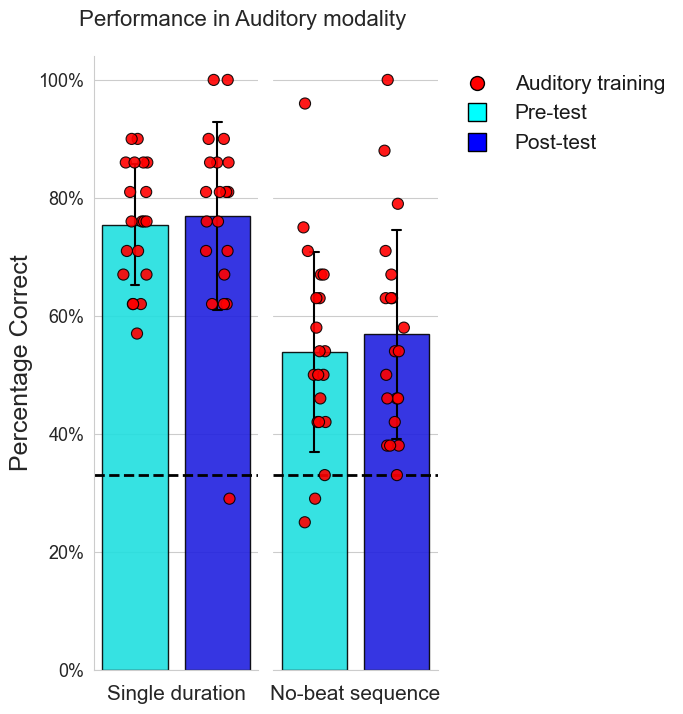

In [11]:
df_beatremoved1,df_beatremoved12,df_beatremoved13=df_beatremoved[df_beatremoved['group']=='aud'],df_beatremoved[df_beatremoved['group']=='vis'],df_beatremoved[df_beatremoved['group']=='notrain']
individual_groups=[df_beatremoved1]
modality=['Auditory'] 
mod=['aud'] 
color=['red'] 

for group, modality, mod, color in zip(individual_groups, modality, mod, color):
    make_2bar_plots(group,'Auditory',modality, mod, color)

In [12]:
dfvis_beatremoved=df.melt(['Time','group'],['VisSD','VisIrreg'],var_name='Timing_level',value_name='value')

dfvis_beatremoved

,Time,group,Timing_level,value
0,Pre,aud,VisSD,0.71
1,Post,aud,VisSD,0.62
2,Pre,vis,VisSD,0.43
3,Post,vis,VisSD,0.29
4,Pre,notrain,VisSD,0.57
...,...,...,...,...
251,Post,aud,VisIrreg,0.75
252,Pre,notrain,VisIrreg,0.38
253,Post,notrain,VisIrreg,0.67
254,Pre,notrain,VisIrreg,0.50


In [13]:
# Visual training group
vissd_pre = dfvis_beatremoved[(dfvis_beatremoved['Timing_level']=='VisSD')&(dfvis_beatremoved['Time']=='Pre')&(dfvis_beatremoved['group']=='vis')]['value']
vissd_post = dfvis_beatremoved[(dfvis_beatremoved['Timing_level']=='VisSD')&(dfvis_beatremoved['Time']=='Post')&(dfvis_beatremoved['group']=='vis')]['value']
visirreg_pre = dfvis_beatremoved[(dfvis_beatremoved['Timing_level']=='VisIrreg')&(dfvis_beatremoved['Time']=='Pre')&(dfvis_beatremoved['group']=='vis')]['value']
visirreg_post = dfvis_beatremoved[(dfvis_beatremoved['Timing_level']=='VisIrreg')&(dfvis_beatremoved['Time']=='Post')&(dfvis_beatremoved['group']=='vis')]['value']
print(f"mean VisSD pre-test is {vissd_pre.mean()}")
print(f"mean VisSD post-test is {vissd_post.mean()}")
print(f"mean VisIrreg pre-test is {visirreg_pre.mean()}")
print(f"mean VisIrreg post-test is {visirreg_post.mean()}")

mean VisSD pre-test is 0.6954166666666667
mean VisSD post-test is 0.64875
mean VisIrreg pre-test is 0.62
mean VisIrreg post-test is 0.6379166666666666


In [14]:
t_statistic, p_value = ttest_rel(vissd_pre, vissd_post)
print(t_statistic)
display(p_value)
t_statistic, p_value = ttest_rel(visirreg_pre, visirreg_post)
print(t_statistic)
print(p_value)

1.5276240718106873


0.14024244370046693

-0.4508885221497186
0.656292049540685


<Figure size 300x400 with 0 Axes>

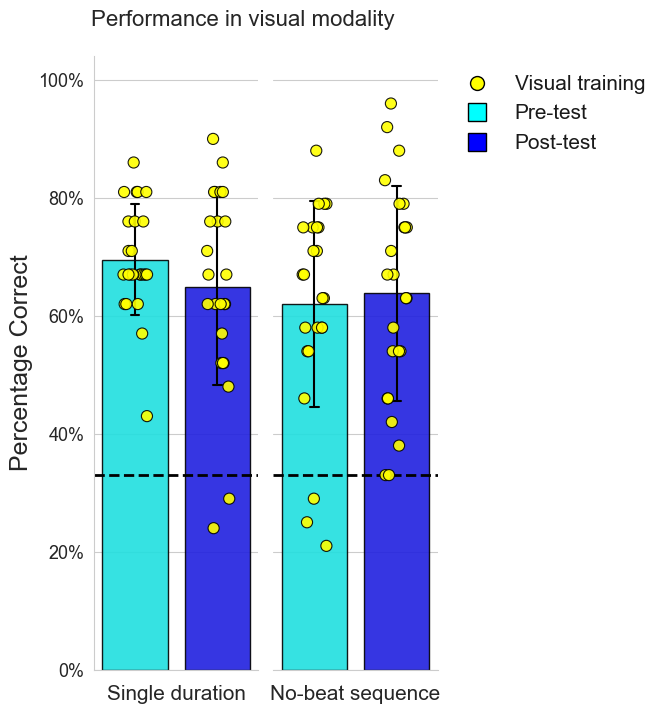

In [15]:
dfvis_beatremoved1,dfvis_beatremoved12,dfvis_beatremoved13=dfvis_beatremoved[dfvis_beatremoved['group']=='aud'],dfvis_beatremoved[dfvis_beatremoved['group']=='vis'],dfvis_beatremoved[dfvis_beatremoved['group']=='notrain']
individual_groups=[dfvis_beatremoved12]
modality=['Visual'] 
mod=['vis'] 
color=['yellow'] 

for group, modality, mod, color in zip(individual_groups, modality, mod, color):
    make_2bar_plots(group,'visual',modality, mod, color)

# <span style='background:yellow'> Beat performance for trained and untrained trials _ Auditory modality

In [58]:
# Added training group numbers at the start of each trial column name and then changed the name of train_notrain.csv to train_notrain_groups.csv 
train_notrain = pd.read_csv('../auditory_training/results/TrainingMaterials.csv')
print(train_notrain.shape)
train_notrain.head()

(128, 28)


,Unnamed: 0,Participant,"1AudReg\n[2,1,1,3,1,1,3],[2,1,1,3,1,1,3],[2,1,1,3,1,3,1]","2AudReg\n[3,1,4,1,3],[3,1,4,1,3],[3,1,4,3,1]","1AudReg\n[2,1,1,2,2,4],[2,1,1,2,2,4],[1,1,2,2,2,4]","2AudReg\n[2,1,1,2,2,1,3],[2,1,1,2,2,3,1],[2,1,1,2,2,3,1]","2AudReg\n[2,1,1,4,1,3],[2,1,1,4,3,1],[2,1,1,4,1,3]","1AudReg\n[1,1,2,3,1,1,3],[1,1,2,3,1,3,1],[1,1,2,3,1,1,3]","2AudReg\n[3,1,4,2,2],[1,3,4,2,2],[3,1,4,2,2]","2AudReg\n[1,1,2,2,1,1,4],[1,1,2,2,1,1,4],[1,1,2,1,1,2,4]",...,"1AudReg\n[2,2,1,3,3,1],[2,2,1,3,3,1],[2,2,1,3,1,3]","1AudReg\n[4,3,1,2,2],[4,1,3,2,2],[4,3,1,2,2]","2AudReg\n[1,1,2,3,1,2,2],[1,1,2,1,3,2,2],[1,1,2,3,1,2,2]","2AudReg\n[3,1,1,3,2,2],[3,1,3,1,2,2],[3,1,1,3,2,2]","2AudReg\n[4,2,2,1,1,2],[4,2,2,2,1,1],[4,2,2,1,1,2]","1AudReg\n[4,1,1,1,1,3,1],[4,1,1,1,1,3,1],[4,1,1,1,1,1,3]","2AudReg\n[3,1,2,2,3,1],[3,1,2,2,1,3],[3,1,2,2,1,3]","1AudReg\n[4,1,3,3,1],[4,3,1,3,1],[4,1,3,3,1]",group,Time
0,0,train10_audtrain2_2023-11-09,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,0,1,aud,Pre
1,1,train10_audtrain2_post_2023-11-23,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,aud,Post
2,2,train11_vistrain2_2023-11-09,0,1,0,1,0,0,1,1,...,1,1,0,1,1,1,1,0,vis,Pre
3,3,train11_vistrain2_post_2023-11-23,1,1,1,0,1,0,1,0,...,0,1,0,0,0,0,1,1,vis,Post
4,4,train14_notrain_2023-11-10,0,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,notrain,Pre


In [59]:
def specify_group(x):
    parts=x.split('_')[1]
    if parts == 'audtrain1':
        return 'aud1'
    elif parts == 'audtrain2':
        return 'aud2'
    elif parts == 'vistrain1':
        return 'vis1'
    elif parts == 'vistrain2':
        return 'vis2'
    elif parts == 'notrain':
        return 'notrain'
train_notrain['group']=train_notrain['Participant'].apply(specify_group)
train_notrain.head()

,Unnamed: 0,Participant,"1AudReg\n[2,1,1,3,1,1,3],[2,1,1,3,1,1,3],[2,1,1,3,1,3,1]","2AudReg\n[3,1,4,1,3],[3,1,4,1,3],[3,1,4,3,1]","1AudReg\n[2,1,1,2,2,4],[2,1,1,2,2,4],[1,1,2,2,2,4]","2AudReg\n[2,1,1,2,2,1,3],[2,1,1,2,2,3,1],[2,1,1,2,2,3,1]","2AudReg\n[2,1,1,4,1,3],[2,1,1,4,3,1],[2,1,1,4,1,3]","1AudReg\n[1,1,2,3,1,1,3],[1,1,2,3,1,3,1],[1,1,2,3,1,1,3]","2AudReg\n[3,1,4,2,2],[1,3,4,2,2],[3,1,4,2,2]","2AudReg\n[1,1,2,2,1,1,4],[1,1,2,2,1,1,4],[1,1,2,1,1,2,4]",...,"1AudReg\n[2,2,1,3,3,1],[2,2,1,3,3,1],[2,2,1,3,1,3]","1AudReg\n[4,3,1,2,2],[4,1,3,2,2],[4,3,1,2,2]","2AudReg\n[1,1,2,3,1,2,2],[1,1,2,1,3,2,2],[1,1,2,3,1,2,2]","2AudReg\n[3,1,1,3,2,2],[3,1,3,1,2,2],[3,1,1,3,2,2]","2AudReg\n[4,2,2,1,1,2],[4,2,2,2,1,1],[4,2,2,1,1,2]","1AudReg\n[4,1,1,1,1,3,1],[4,1,1,1,1,3,1],[4,1,1,1,1,1,3]","2AudReg\n[3,1,2,2,3,1],[3,1,2,2,1,3],[3,1,2,2,1,3]","1AudReg\n[4,1,3,3,1],[4,3,1,3,1],[4,1,3,3,1]",group,Time
0,0,train10_audtrain2_2023-11-09,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,0,1,aud2,Pre
1,1,train10_audtrain2_post_2023-11-23,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,aud2,Post
2,2,train11_vistrain2_2023-11-09,0,1,0,1,0,0,1,1,...,1,1,0,1,1,1,1,0,vis2,Pre
3,3,train11_vistrain2_post_2023-11-23,1,1,1,0,1,0,1,0,...,0,1,0,0,0,0,1,1,vis2,Post
4,4,train14_notrain_2023-11-10,0,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,notrain,Pre


# aud1 group

In [60]:
wanted_rows = train_notrain['group'] == 'aud1'
wanted_cols = [i for i in train_notrain.columns[2:-2] if i[0] == '1']
unwanted_cols = [i for i in train_notrain.columns[2:-2] if i[0] == '2']
tr = train_notrain.loc[wanted_rows, ['Participant','group','Time'] + wanted_cols]
notr = train_notrain.loc[wanted_rows, ['Participant','group','Time'] + unwanted_cols]

In [61]:
basic = tr.iloc[:,:3]
numeric_columns = tr.select_dtypes(include=['int', 'float']).columns
numeric_cols_untrain = notr.select_dtypes(include=['int', 'float']).columns
basic['trained'] = tr[numeric_columns].mean(axis=1)
basic['untrained'] = notr[numeric_cols_untrain].mean(axis=1)

In [62]:
basic.shape

(20, 5)

# aud2 group

In [63]:
wanted_rows = train_notrain['group'] == 'aud2'
wanted_cols = [i for i in train_notrain.columns[2:-2] if i[0] == '2']
unwanted_cols = [i for i in train_notrain.columns[2:-2] if i[0] == '1']
tr2 = train_notrain.loc[wanted_rows, ['Participant','group','Time'] + wanted_cols]
notr2 = train_notrain.loc[wanted_rows, ['Participant','group','Time'] + unwanted_cols]

In [64]:
basic2 = tr2.iloc[:,:3]
numeric_columns = tr2.select_dtypes(include=['int', 'float']).columns
numeric_cols_untrain = notr2.select_dtypes(include=['int', 'float']).columns
basic2['trained'] = tr2[numeric_columns].mean(axis=1)
basic2['untrained'] = notr2[numeric_cols_untrain].mean(axis=1)

In [65]:
basic2.shape

(20, 5)

In [66]:
final_basic=pd.concat([basic,basic2],axis=0)
final_basic.head()

,Participant,group,Time,trained,untrained
16,train23_audtrain1_2023-11-15,aud1,Pre,0.916667,0.833333
17,train23_audtrain1_post_2023-11-27,aud1,Post,1.000000,0.916667
32,train34_audtrain1_2023-11-18,aud1,Pre,0.916667,0.833333
33,train34_audtrain1_post_2023-12-03,aud1,Post,1.000000,1.000000
42,train39_audtrain1_2023-11-19,aud1,Pre,0.666667,0.583333


In [67]:
print(f"trained pretest is {final_basic[final_basic['Time']=='Pre']['trained'].mean()}")
print(f"trained posttest is {final_basic[final_basic['Time']=='Post']['trained'].mean()}")
print(f"untrained pretest is {final_basic[final_basic['Time']=='Pre']['untrained'].mean()}")
print(f"untrained posttest is {final_basic[final_basic['Time']=='Post']['untrained'].mean()}")

trained pretest is 0.6666666666666666
trained posttest is 0.75
untrained pretest is 0.6291666666666667
untrained posttest is 0.7041666666666667


In [68]:
# running paired t-test
from scipy.stats import ttest_rel
t_statistic, p_value = ttest_rel(final_basic[final_basic['Time']=='Pre']['trained'], final_basic[final_basic['Time']=='Post']['trained'])
print(t_statistic)
display(p_value)
t_statistic, p_value = ttest_rel(final_basic[final_basic['Time']=='Pre']['untrained'], final_basic[final_basic['Time']=='Post']['untrained'])
print(t_statistic)
print(p_value)

-2.475688239270954


0.022881830832418126

-2.1964633870516277
0.040669974696092105


In [69]:
cc = final_basic.melt(['group','Time'],['trained','untrained'],var_name='training',value_name='value')
# cc['colour'] = ['red' if t == 'Pre' else 'green' for t in cc['Time']]
cc.head()

,group,Time,training,value
0,aud1,Pre,trained,0.916667
1,aud1,Post,trained,1.000000
2,aud1,Pre,trained,0.916667
3,aud1,Post,trained,1.000000
4,aud1,Pre,trained,0.666667


<Figure size 300x400 with 0 Axes>

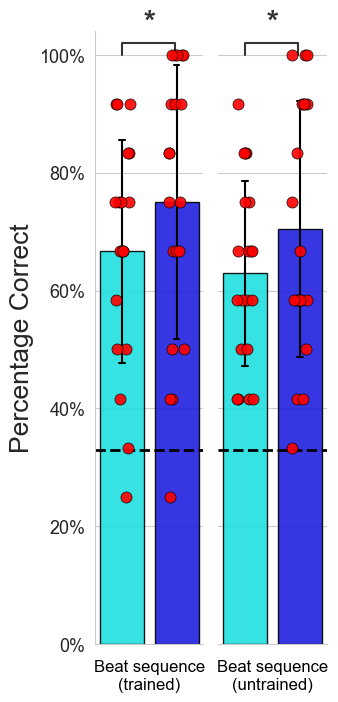

In [70]:
# didn't print x-axis title in two lines cause otherwise the dimensions won't align with SD and no-beat plot created in other code!
sns.set_style('whitegrid')
plt.figure(figsize=(3,4))
# light_cyan = sns.light_palette("cyan", as_cmap=True)
# dark_cyan = sns.dark_palette("cyan", as_cmap=True)
g=sns.catplot(data=cc,kind='bar',x='Time',y='value',col='training',ci='sd',edgecolor="black",
              palette=["cyan", "blue"],errcolor="black", errwidth=1.5, capsize = 0.1, height=7, aspect=0.22,alpha=0.9,
              legend=False, sharey=True, sharex=True, margin_titles=False)
# palette=['red' if t=='Pre' else 'green' for t in cc['Time']]
g.map(sns.stripplot,'Time','value', dodge=True,color='red', #,hue=cc['group'],palette=['red','red']
       jitter=0.15,alpha=0.9, ec='k', linewidth=0.5, size=8)
############ Aestetics ###############
g.fig.tight_layout()
g.set_axis_labels("","Percentage Correct",size=19)
g.set_titles('')
g.axes[0,0].set_xlabel('Beat sequence\n(trained)',color='black',alpha=1,size=12)
g.axes[0,1].set_xlabel('Beat sequence\n(untrained)',color='black',alpha=1,size=12)
# g.axes[0,2].set_xlabel('Beat sequence',color='black',alpha=1,size=15)
g.set_titles(row_template='{row_name}',col_template='{col_name}')
g.set_titles("")
sns.despine(ax=g.axes[0, 1], left=True)
# sns.despine(ax=g.axes[0, 2], left=True)
g.set_xticklabels([]) # makes labels for each bar disappers
g.set_yticklabels(size=13)
g.axes[0,0].axhline(y=0.33, color='black', linestyle='--',lw=2)
g.axes[0,1].axhline(y=0.33, color='black', linestyle='--',lw=2)
# g.axes[0,2].axhline(y=0.33, color='black', linestyle='--',lw=2)
# g.fig.suptitle("Performance in auditory modality", y=1.02,size=16)  

############## legend ################
# new_labels = ['Auditory training', 'Visual training', 'No training','Pre-test', 'Post-test']
# handles_swarm, labels_swarm = g.axes[0, 0].get_legend_handles_labels()

# # Create a legend with custom icon colors
# legend_colors = ['red','yellow','white', 'cyan','blue']  # Replace with your desired colors

# custom_handles = [
#     plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markeredgecolor='black', markersize=10) if idx < 3
#     else plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markeredgecolor='black', markersize=13)
#     for idx, color in enumerate(legend_colors)
# ]

# dot_legend = plt.legend(custom_handles, new_labels, loc='upper left', bbox_to_anchor=(1, 1),
#                         frameon=False, fontsize=15, labelcolor='0.1', title='')

# # Optionally, set the legend text (labels) color
# dot_legend.get_title().set_color('0.2')  

########### Statistical significance #################
max_val= 1 #max(cc['value'])
g.axes[0,0].plot([0,0,0.97,0.97],[max_val,max_val+0.02,max_val+0.02,max_val],lw=1.5,color='0.2',clip_on=False)
# g.axes[0,0].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].text(x=0.5,y=max_val+0.04, s='*',ha='center',size=22,weight='bold',color='0.2')
# g.axes[0,0].text(x=1,y=max_val+0.07, s='****',ha='center',size=20,weight='bold',color='0.2')

g.axes[0,1].plot([0,0,0.97,0.97],[max_val,max_val+0.02,max_val+0.02,max_val],lw=1.5,color='0.2',clip_on=False)
# g.axes[0,1].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].text(x=0.5,y=max_val+0.04, s='*',ha='center',size=22,weight='bold',color='0.2')
# g.axes[0,1].text(x=1,y=max_val+0.07, s='****',ha='center',size=20,weight='bold',color='0.2')

from matplotlib.ticker import PercentFormatter
g.axes[0, 0].set_ylim(0, 1.04)
g.axes[0, 0].yaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))
plt.savefig('../plots/AuditoryPerformance_AuditoryTrain_TrainedUntrained.png', bbox_inches='tight',dpi=250)
plt.show()

# <span style='background:yellow'> Beat performance for trained and untrained trials _ Visual modality

In [43]:
# Added training group numbers at the start of each trial column name and then changed the name of train_notrain.csv to train_notrain_groups.csv 
train_notrain = pd.read_csv('../visual_training/results/TrainingMaterials_vis.csv')
print(train_notrain.shape)
train_notrain.head()

(128, 28)


,Unnamed: 0,Participant,"2VisReg\n[3,1,4,3,1,1],[3,1,4,1,3,1],[3,1,4,1,3,1]","2VisReg\n[3,1,2,2,1,1,2,1],[1,3,2,2,1,1,2,1],[3,1,2,2,1,1,2,1]","2VisReg\n[3,1,3,1,2,2,1],[3,1,1,3,2,2,1],[3,1,1,3,2,2,1]","1VisReg\n[1,1,2,3,1,1,3,1],[1,1,2,3,1,1,3,1],[1,1,2,3,1,3,1,1]","2VisReg\n[3,1,2,2,3,1,1],[3,1,2,2,1,3,1],[3,1,2,2,1,3,1]","1VisReg\n[2,2,1,1,1,1,4,1],[2,1,1,2,1,1,4,1],[2,2,1,1,1,1,4,1]","1VisReg\n[4,1,1,2,3,1,1],[4,1,1,2,3,1,1],[4,1,1,2,1,3,1]","2VisReg\n[2,1,1,2,2,3,1,1],[2,1,1,2,2,3,1,1],[2,1,1,2,2,1,3,1]",...,"2VisReg\n[3,1,2,1,1,1,3,1],[3,1,2,1,1,1,3,1],[3,1,2,1,1,3,1,1]","1VisReg\n[1,1,2,1,3,4,1],[1,1,2,3,1,4,1],[1,1,2,3,1,4,1]","2VisReg\n[1,1,2,3,1,2,2,1],[1,1,2,1,3,2,2,1],[1,1,2,3,1,2,2,1]","1VisReg\n[4,1,1,1,1,1,3,1],[4,1,1,1,1,3,1,1],[4,1,1,1,1,3,1,1]","2VisReg\n[1,1,2,2,1,1,4,1],[1,1,2,2,1,1,4,1],[1,1,2,1,1,2,4,1]","2VisReg\n[4,2,2,1,1,2,1],[4,2,2,2,1,1,1],[4,2,2,1,1,2,1]","1VisReg\n[4,2,1,1,2,1,1,1],[4,2,2,1,1,1,1,1],[4,2,2,1,1,1,1,1]","2VisReg\n[2,1,1,4,1,3,1],[2,1,1,4,3,1,1],[2,1,1,4,1,3,1]",group,Time
0,0,train10_audtrain2_2023-11-09,1,1,1,0,1,0,0,1,...,0,1,0,1,0,0,1,0,aud,Pre
1,1,train10_audtrain2_post_2023-11-23,1,0,0,0,0,0,1,1,...,1,0,0,1,1,0,0,1,aud,Post
2,2,train11_vistrain2_2023-11-09,1,0,0,0,0,0,1,0,...,0,0,1,1,1,1,0,0,vis,Pre
3,3,train11_vistrain2_post_2023-11-23,1,0,1,0,0,1,1,1,...,0,1,0,0,0,0,1,1,vis,Post
4,4,train14_notrain_2023-11-10,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,notrain,Pre


In [44]:
def specify_group(x):
    parts=x.split('_')[1]
    if parts == 'audtrain1':
        return 'aud1'
    elif parts == 'audtrain2':
        return 'aud2'
    elif parts == 'vistrain1':
        return 'vis1'
    elif parts == 'vistrain2':
        return 'vis2'
    elif parts == 'notrain':
        return 'notrain'
train_notrain['group']=train_notrain['Participant'].apply(specify_group)
train_notrain.head()

,Unnamed: 0,Participant,"2VisReg\n[3,1,4,3,1,1],[3,1,4,1,3,1],[3,1,4,1,3,1]","2VisReg\n[3,1,2,2,1,1,2,1],[1,3,2,2,1,1,2,1],[3,1,2,2,1,1,2,1]","2VisReg\n[3,1,3,1,2,2,1],[3,1,1,3,2,2,1],[3,1,1,3,2,2,1]","1VisReg\n[1,1,2,3,1,1,3,1],[1,1,2,3,1,1,3,1],[1,1,2,3,1,3,1,1]","2VisReg\n[3,1,2,2,3,1,1],[3,1,2,2,1,3,1],[3,1,2,2,1,3,1]","1VisReg\n[2,2,1,1,1,1,4,1],[2,1,1,2,1,1,4,1],[2,2,1,1,1,1,4,1]","1VisReg\n[4,1,1,2,3,1,1],[4,1,1,2,3,1,1],[4,1,1,2,1,3,1]","2VisReg\n[2,1,1,2,2,3,1,1],[2,1,1,2,2,3,1,1],[2,1,1,2,2,1,3,1]",...,"2VisReg\n[3,1,2,1,1,1,3,1],[3,1,2,1,1,1,3,1],[3,1,2,1,1,3,1,1]","1VisReg\n[1,1,2,1,3,4,1],[1,1,2,3,1,4,1],[1,1,2,3,1,4,1]","2VisReg\n[1,1,2,3,1,2,2,1],[1,1,2,1,3,2,2,1],[1,1,2,3,1,2,2,1]","1VisReg\n[4,1,1,1,1,1,3,1],[4,1,1,1,1,3,1,1],[4,1,1,1,1,3,1,1]","2VisReg\n[1,1,2,2,1,1,4,1],[1,1,2,2,1,1,4,1],[1,1,2,1,1,2,4,1]","2VisReg\n[4,2,2,1,1,2,1],[4,2,2,2,1,1,1],[4,2,2,1,1,2,1]","1VisReg\n[4,2,1,1,2,1,1,1],[4,2,2,1,1,1,1,1],[4,2,2,1,1,1,1,1]","2VisReg\n[2,1,1,4,1,3,1],[2,1,1,4,3,1,1],[2,1,1,4,1,3,1]",group,Time
0,0,train10_audtrain2_2023-11-09,1,1,1,0,1,0,0,1,...,0,1,0,1,0,0,1,0,aud2,Pre
1,1,train10_audtrain2_post_2023-11-23,1,0,0,0,0,0,1,1,...,1,0,0,1,1,0,0,1,aud2,Post
2,2,train11_vistrain2_2023-11-09,1,0,0,0,0,0,1,0,...,0,0,1,1,1,1,0,0,vis2,Pre
3,3,train11_vistrain2_post_2023-11-23,1,0,1,0,0,1,1,1,...,0,1,0,0,0,0,1,1,vis2,Post
4,4,train14_notrain_2023-11-10,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,notrain,Pre


# vis1 group

In [45]:
wanted_rows = train_notrain['group'] == 'vis1'
wanted_cols = [i for i in train_notrain.columns[2:-2] if i[0] == '1']
unwanted_cols = [i for i in train_notrain.columns[2:-2] if i[0] == '2']
tr = train_notrain.loc[wanted_rows, ['Participant','group','Time'] + wanted_cols]
notr = train_notrain.loc[wanted_rows, ['Participant','group','Time'] + unwanted_cols]

In [46]:
basic = tr.iloc[:,:3]
numeric_columns = tr.select_dtypes(include=['int', 'float']).columns
numeric_cols_untrain = notr.select_dtypes(include=['int', 'float']).columns
basic['trained'] = tr[numeric_columns].mean(axis=1)
basic['untrained'] = notr[numeric_cols_untrain].mean(axis=1)

In [47]:
basic.shape

(24, 5)

# vis2 group

In [48]:
wanted_rows = train_notrain['group'] == 'vis2'
wanted_cols = [i for i in train_notrain.columns[2:-2] if i[0] == '2']
unwanted_cols = [i for i in train_notrain.columns[2:-2] if i[0] == '1']
tr2 = train_notrain.loc[wanted_rows, ['Participant','group','Time'] + wanted_cols]
notr2 = train_notrain.loc[wanted_rows, ['Participant','group','Time'] + unwanted_cols]

In [49]:
basic2 = tr2.iloc[:,:3]
numeric_columns = tr2.select_dtypes(include=['int', 'float']).columns
numeric_cols_untrain = notr2.select_dtypes(include=['int', 'float']).columns
basic2['trained'] = tr2[numeric_columns].mean(axis=1)
basic2['untrained'] = notr2[numeric_cols_untrain].mean(axis=1)

In [50]:
basic2.shape

(24, 5)

In [51]:
final_basic=pd.concat([basic,basic2],axis=0)
final_basic.head(3)

,Participant,group,Time,trained,untrained
8,train19_vistrain1_2023-11-13,vis1,Pre,0.250000,0.416667
9,train19_vistrain1_post_2023-11-26,vis1,Post,0.750000,0.750000
14,train22_vistrain1_2023-11-15,vis1,Pre,0.583333,0.500000


In [52]:
print(f"trained pretest is {final_basic[final_basic['Time']=='Pre']['trained'].mean()}")
print(f"trained posttest is {final_basic[final_basic['Time']=='Post']['trained'].mean()}")
print(f"untrained pretest is {final_basic[final_basic['Time']=='Pre']['untrained'].mean()}")
print(f"untrained posttest is {final_basic[final_basic['Time']=='Post']['untrained'].mean()}")

trained pretest is 0.49652777777777773
trained posttest is 0.5729166666666666
untrained pretest is 0.46527777777777785
untrained posttest is 0.6215277777777778


In [53]:
t_statistic, p_value = ttest_rel(final_basic[final_basic['Time']=='Pre']['trained'], final_basic[final_basic['Time']=='Post']['trained'])
print(t_statistic)
display(p_value)
t_statistic, p_value = ttest_rel(final_basic[final_basic['Time']=='Pre']['untrained'], final_basic[final_basic['Time']=='Post']['untrained'])
print(t_statistic)
print(p_value)

-1.8757215215206728


0.07344365327981303

-3.9461012588929227
0.0006430541808572158


In [54]:
cc = final_basic.melt(['group','Time'],['trained','untrained'],var_name='training',value_name='value')
# cc['colour'] = ['red' if t == 'Pre' else 'green' for t in cc['Time']]
cc.head()

,group,Time,training,value
0,vis1,Pre,trained,0.250000
1,vis1,Post,trained,0.750000
2,vis1,Pre,trained,0.583333
3,vis1,Post,trained,0.666667
4,vis1,Pre,trained,0.416667


<Figure size 300x400 with 0 Axes>

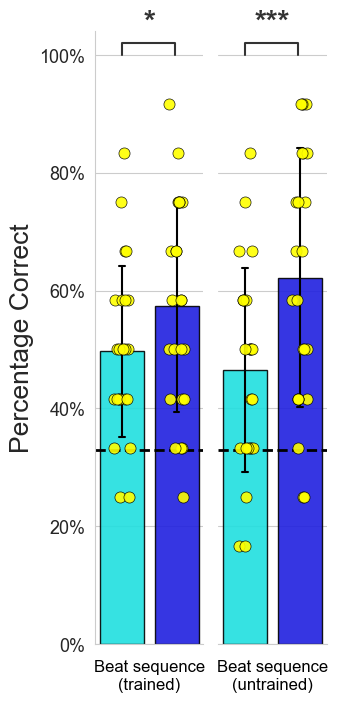

In [57]:
# didn't print x-axis title in two lines cause otherwise the dimensions won't align with SD and no-beat plot created in other code!
sns.set_style('whitegrid')
plt.figure(figsize=(3,4))
# light_cyan = sns.light_palette("cyan", as_cmap=True)
# dark_cyan = sns.dark_palette("cyan", as_cmap=True)
g=sns.catplot(data=cc,kind='bar',x='Time',y='value',col='training',ci='sd',edgecolor="black",
              palette=["cyan", "blue"],errcolor="black", errwidth=1.5, capsize = 0.1, height=7, aspect=0.22,alpha=0.9,
              legend=False, sharey=True, sharex=True, margin_titles=False)
# palette=['red' if t=='Pre' else 'green' for t in cc['Time']]
g.map(sns.stripplot,'Time','value', dodge=True,color='yellow', #,hue=cc['group'],palette=['red','red']
       jitter=0.15,alpha=0.9, ec='k', linewidth=0.5, size=8)
############ Aestetics ###############
g.fig.tight_layout()
g.set_axis_labels("","Percentage Correct",size=19)
g.set_titles('')
g.axes[0,0].set_xlabel('Beat sequence\n(trained)',color='black',alpha=1,size=12)
g.axes[0,1].set_xlabel('Beat sequence\n(untrained)',color='black',alpha=1,size=12)
# g.axes[0,2].set_xlabel('Beat sequence',color='black',alpha=1,size=15)
g.set_titles(row_template='{row_name}',col_template='{col_name}')
g.set_titles("")
sns.despine(ax=g.axes[0, 1], left=True)
# sns.despine(ax=g.axes[0, 2], left=True)
g.set_xticklabels([]) # makes labels for each bar disappers
g.set_yticklabels(size=13)
g.axes[0,0].axhline(y=0.33, color='black', linestyle='--',lw=2)
g.axes[0,1].axhline(y=0.33, color='black', linestyle='--',lw=2)
# g.axes[0,2].axhline(y=0.33, color='black', linestyle='--',lw=2)
# g.fig.suptitle("Performance in visual modality", y=1.02,size=16)  

############## legend ################
# new_labels = ['Auditory training', 'Visual training', 'No training','Pre-test', 'Post-test']
# handles_swarm, labels_swarm = g.axes[0, 0].get_legend_handles_labels()

# # Create a legend with custom icon colors
# legend_colors = ['red','yellow','white', 'cyan','blue']  # Replace with your desired colors

# custom_handles = [
#     plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markeredgecolor='black', markersize=10) if idx < 3
#     else plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markeredgecolor='black', markersize=13)
#     for idx, color in enumerate(legend_colors)
# ]

# dot_legend = plt.legend(custom_handles, new_labels, loc='upper left', bbox_to_anchor=(1, 1),
#                         frameon=False, fontsize=15, labelcolor='0.1', title='')

# # Optionally, set the legend text (labels) color
# dot_legend.get_title().set_color('0.2')  

########### Statistical significance #################
max_val=1 #max(cc['value'])
g.axes[0,0].plot([0,0,0.97,0.97],[max_val,max_val+0.02,max_val+0.02,max_val],lw=1.5,color='0.2',clip_on=False)
# g.axes[0,0].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].text(x=0.5,y=max_val+0.04, s='*',ha='center',size=22,weight='bold',color='0.2')
# g.axes[0,0].text(x=1,y=max_val+0.07, s='****',ha='center',size=20,weight='bold',color='0.2')

g.axes[0,1].plot([0,0,0.97,0.97],[max_val,max_val+0.02,max_val+0.02,max_val],lw=1.5,color='0.2',clip_on=False)
# g.axes[0,1].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].text(x=0.5,y=max_val+0.04, s='***',ha='center',size=22,weight='bold',color='0.2')
# g.axes[0,1].text(x=1,y=max_val+0.07, s='****',ha='center',size=20,weight='bold',color='0.2')

from matplotlib.ticker import PercentFormatter
g.axes[0, 0].set_ylim(0, 1.04)
g.axes[0, 0].yaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))
plt.savefig('../plots/VisualPerformance_VisualTrain_TrainedUntrained.png', bbox_inches='tight',dpi=250)
plt.show()